Source: https://youtu.be/EdJ7RoWcU48

In [1]:
from qiskit.aqua.algorithms import Shor
from qiskit.aqua import QuantumInstance
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend,shots=1000)
my_shor = Shor(N=15, quantum_instance=quantum_instance)

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\algorithms\factorizers\shor.py:69: DeprecationWarning: The package qiskit.aqua.algorithms.factorizers is deprecated. It was moved/refactored to qiskit.algorithms.factorizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.factorizers',


In [3]:
Shor.run(my_shor)

{'factors': [[3, 5]], 'total_counts': 68, 'successful_counts': 19}

In [5]:
def c_amod15(a,power):
    U = QuantumCircuit(4)
    for iteration in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        for q in range(4):
            U.x(q)
    u = U.to_gate()
    U.name= "%i^%i mod 15" % (a,power)
    c_U = U.control()
    return c_U

In [17]:
n_count = 8
a = 7

In [18]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)),m,j)
        qc.h(j)
    qc.name = 'QFT dagger'
    return qc

In [19]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)

qc.x(3+n_count)

for q in range(n_count):
    qc.append(c_amod15(a,2**q),[q] + [i+n_count for i in range(4)])
    
qc.append(qft_dagger(n_count),range(n_count))

qc.measure(range(n_count),range(n_count))

qc.draw()

┌───┐┌───────────────┐                                                   »
 q_0: ┤ H ├┤0              ├───────────────────────────────────────────────────»
      ├───┤│               │┌───────────────┐                                  »
 q_1: ┤ H ├┤               ├┤0              ├──────────────────────────────────»
      ├───┤│               ││               │┌───────────────┐                 »
 q_2: ┤ H ├┤               ├┤               ├┤0              ├─────────────────»
      ├───┤│               ││               ││               │┌───────────────┐»
 q_3: ┤ H ├┤               ├┤               ├┤               ├┤0              ├»
      ├───┤│               ││               ││               ││               │»
 q_4: ┤ H ├┤               ├┤               ├┤               ├┤               ├»
      ├───┤│               ││               ││               ││               │»
 q_5: ┤ H ├┤               ├┤               ├┤               ├┤               ├»
      ├───┤│  c_7^1 mod 15 ││               ││               ││               │»
 q_6: ┤ H ├┤               ├┤  c_7^2 mod 15 ├┤               ├┤               ├»
      ├───┤│               ││               ││  c_7^4 mod 15 ││               │»
 q_7: ┤ H ├┤               ├┤               ├┤               ├┤  c_7^8 mod 15 ├»
      └───┘│               ││               ││               ││               │»
 q_8: ─────┤1              ├┤1              ├┤1              ├┤1              ├»
           │               ││               ││               ││               │»
 q_9: ─────┤2              ├┤2              ├┤2              ├┤2              ├»
           │               ││               ││               ││               │»
q_10: ─────┤3              ├┤3              ├┤3              ├┤3              ├»
      ┌───┐│               ││               ││               ││               │»
q_11: ┤ X ├┤4              ├┤4              ├┤4              ├┤4              ├»
      └───┘└───────────────┘└───────────────┘└───────────────┘└───────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                            »
« q_0: ──────────────────────────────────────────────────────»
«                                                            »
« q_1: ──────────────────────────────────────────────────────»
«                                                            »
« q_2: ──────────────────────────────────────────────────────»
«                                                            »
« q_3: ──────────────────────────────────────────────────────»
«      ┌────────────────┐                                    »
« q_4: ┤0               ├────────────────────────────────────»
«      │                │┌────────────────┐                  »
« q_5: ┤                ├┤0               ├──────────────────»
«      │                ││                │┌────────────────┐»
« q_6: ┤                ├┤                ├┤0               ├»
«      │                ││                ││                │»
« q_7: ┤                ├┤                ├┤                ├»
«      │  c_7^16 mod 15 ││                ││                │»
« q_8: ┤1               ├┤1 c_7^32 mod 15 ├┤1               ├»
«      │                ││                ││  c_7^64 mod 15 │»
« q_9: ┤2               ├┤2               ├┤2               ├»
«      │                ││                ││                │»
«q_10: ┤3               ├┤3               ├┤3               ├»
«      │                ││                ││                │»
«q_11: ┤4               ├┤4               ├┤4               ├»
«      └────────────────┘└────────────────┘└────────────────┘»
« c: 8/══════════════════════════════════════════════════════»
«                                                            »
«                         ┌─────────────┐┌─┐                     
« q_0: ───────────────────┤0            ├┤M├────────

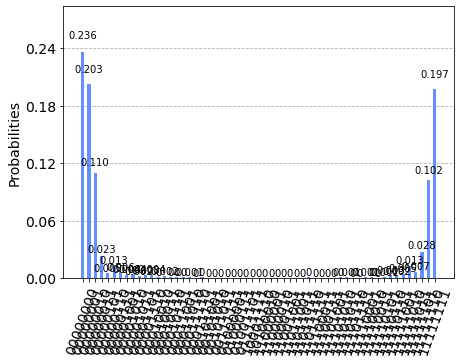

In [20]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()

plot_histogram(counts)